In [2]:
import numpy as np
from numpy import newaxis
import librosa 
import librosa.display
import matplotlib.pyplot as plt 
import os
import glob

In [3]:
# read in audio to audio array for processing

def formataudio(mydir):
    sr = 22050
    dur= 5
    audioarr = np.ones(sr*dur)
    print audioarr.shape
    print len(audioarr)
    
    for filename in glob.glob(mydir + "*.wav"):
        print 'reading in %r' %(filename)
        # load first 10 seconds of audio into numpy, 
        # remember librosa downsamples to 22050
        y, sr = librosa.load(filename, offset=0, duration=dur)
        print y.shape
        audioarr = np.vstack((audioarr,y))
        
    return audioarr

# to just store the HPSS track
def formatpercaudio(mydir):
    sr = 22050
    dur= 5
    lenaudioarr = sr*dur
    audioarr = np.ones(lenaudioarr)
    print audioarr.shape
    
    for filename in glob.glob(mydir + "*.wav"):
        print 'reading in %r' %(filename)
        # load first 10 seconds of audio into numpy, 
        # remember librosa downsamples to 22050
        y, sr = librosa.load(filename, offset=0, duration=dur)
        D = librosa.stft(y)
        D_harmonic, D_percussive = librosa.decompose.hpss(D, margin=8)
        # isft back into td
        yperc = librosa.istft(D_percussive) 
        print yperc.shape
        
        if (len(yperc)<lenaudioarr):
            pad = lenaudioarr-len(yperc) 
            print pad
            print len(yperc)
            # pad with zeros is ifftransformed signal is too small
            yperc = np.concatenate((yperc,np.zeros(pad)))
            print len(yperc)
        if (len(yperc) > lenaudioarr):
            pad = len(yperc) - lenaudioarr 
            print pad 
            print len(yperc) 
            yperc = yperc[0:lenaudioarr]
        
        print audioarr.shape    
        # append to audio array 
        audioarr = np.vstack((audioarr,yperc))
        
    return audioarr

In [4]:
audiodir = './audio/'
#audioarr = formataudio(audiodir)
audioarr = formatpercaudio(audiodir)

(110250,)
reading in './audio/nommo_60.wav'
(110080,)
170
110080
110250
(110250,)
reading in './audio/nommoslice.wav'
(110080,)
170
110080
110250
(2, 110250)


In [5]:
print audioarr.shape
audioarr = audioarr[1:,:]# take out initialization array (zero vect)
print audioarr.shape

(3, 110250)
(2, 110250)


In [6]:
# select one of the audio vectors in audioarr
D = librosa.stft(audioarr[0])
#D_harmonic, D_percussive = librosa.decompose.hpss(D)
D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)



In [7]:
# pre-compute global reference power from input spect 
rp = np.max(np.abs(D)) 

plt.figure(figsize=(12,8)) 

plt.subplot(3,1,1) 
librosa.display.specshow(librosa.amplitude_to_db(D,ref=rp), y_axis='log') 
plt.colorbar() 
plt.title('full spectra')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive, ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()

plt.show()

NameError: name 'D_harmonic' is not defined

In [ ]:
# Let's compute separations for a few different margins and compare the results below
D_harmonic2, D_percussive2 = librosa.decompose.hpss(D, margin=2)
D_harmonic4, D_percussive4 = librosa.decompose.hpss(D, margin=4)
D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
D_harmonic16, D_percussive16 = librosa.decompose.hpss(D, margin=16)

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(5, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=rp), y_axis='log')
plt.title('Harmonic')
plt.yticks([])
plt.ylabel('margin=1')

plt.subplot(5, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive, ref=rp), y_axis='log')
plt.title('Percussive')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic2, ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=2')

plt.subplot(5, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive2, ref=rp), y_axis='log')
plt.yticks([]) ,plt.ylabel('')

plt.subplot(5, 2, 5)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic4, ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=4')

plt.subplot(5, 2, 6)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive4, ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 7)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic8, ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=8')

plt.subplot(5, 2, 8)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive8, ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 9)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic16, ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=16')

plt.subplot(5, 2, 10)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive16, ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# transform percussion filtered stft to time series
yperc = librosa.istft(D_percussive)

ydperc15 = librosa.istft(D_percussive16)

In [ ]:
ydharm8 = librosa.istft(D_harmonic8)

In [ ]:
# transform harmonic filtered stft to time series
yharm = librosa.istft(D_harmonic)

ydharm15 = librosa.istft(D_harmonic15)

In [ ]:
librosa.output.write_wav('yperc.wav', yperc, 44100)

In [ ]:
librosa.output.write_wav('ydperc15.wav', ydperc15, 44100)

In [ ]:
librosa.output.write_wav('ydharm15.wav',ydharm15, 44100)

In [11]:
# beatvector proxy
#beatvector = np.array([[0,1,0,1,0,1,0,1],[1,0,0,1,0,0,1,0]])
beatvector = np.array([[0,0,0,0,0,0,0,0],[1,1,1,1,1,0,1,0]])



# function to write beat samples to audio 
def writebeat(path, beatpattern):
    stepinsamp = 22050 # 0.5 sec  grid window for testing (dellis uses 4 ms)
    [y, sr] = librosa.load(path, offset=0)
    sampsz = len(y)
    window = np.zeros((beatpattern.shape[0], beatpattern.shape[1]*sr))
    print window.shape
                  
    for i in range(beatpattern.shape[0]):
        print beatpattern[i]
        for j in range(beatpattern.shape[1]):
            print 'beatpattern[%r][%r]: %r' %(i,j, beatpattern[i][j])
            if beatpattern[i][j] == 1:
                window[i][(j*sr):(j*sr)+sampsz] = y
    
    return window 

# function to mix learned beat pattern to source audio file
def overlaybeat(path, beatpattern, sourcepath):
    stepinsamp = 22050 # 0.5 sec  grid window for testing (dellis uses 4 ms)
    [ysamp, sr] = librosa.load(path, offset=0)
    dur = len(ysamp)/sr
    print dur
    [ysource, srsource] = librosa.load(sourcepath, offset=0, duration=10)
    
    if srsource != sr:
        print 'sample rates of source and sample are not the same!'
               
    sampsz = len(ysamp)
    sourcesz = len(ysource)
    #window = np.zeros((beatpattern.shape[0], beatpattern.shape[1]*sr))
    window = np.array([ysource,ysource])

    print window.shape
                  
    for i in range(beatpattern.shape[0]):
        print beatpattern[i]
        for j in range(beatpattern.shape[1]):
            print 'beatpattern[%r][%r]: %r' %(i,j, beatpattern[i][j])
            if beatpattern[i][j] == 1:
                window[i][(j*sr):(j*sr)+sampsz] = ysamp + ysource[j*sr:(j*sr)+sampsz]
            elif beatpattern[i][j] == 0:
                window[i][(j*sr):(j*sr)+sampsz] = ysource[j*sr:(j*sr)+sampsz]
    return window
                

#beatsamps = writebeat('./samples/woodblock_mono.wav', beatvector)

#print len(beatsamps)
#print beatsamps.shape

beatsamps = overlaybeat('./samples/woodblock_mono.wav', beatvector, './audio/nommo_60.wav')
    

0
(2, 220500)
[0 0 0 0 0 0 0 0]
beatpattern[0][0]: 0
beatpattern[0][1]: 0
beatpattern[0][2]: 0
beatpattern[0][3]: 0
beatpattern[0][4]: 0
beatpattern[0][5]: 0
beatpattern[0][6]: 0
beatpattern[0][7]: 0
[1 1 1 1 1 0 1 0]
beatpattern[1][0]: 1
beatpattern[1][1]: 1
beatpattern[1][2]: 1
beatpattern[1][3]: 1
beatpattern[1][4]: 1
beatpattern[1][5]: 0
beatpattern[1][6]: 1
beatpattern[1][7]: 0


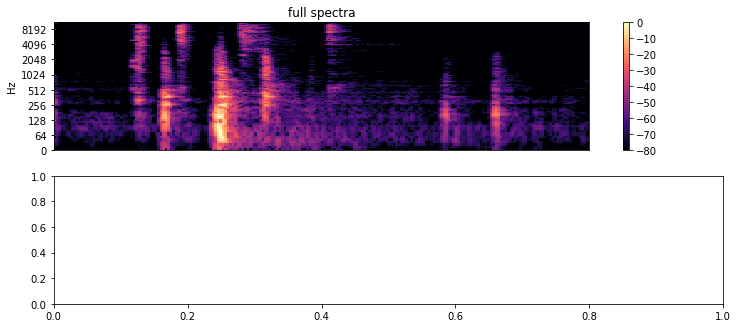

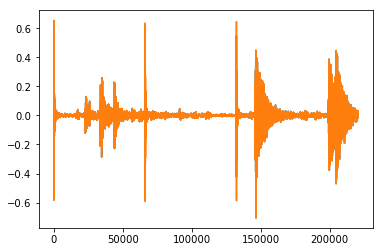

In [9]:
plt.figure() 
plt.plot(beatsamps[0])
plt.plot(beatsamps[1])
plt.show()

In [13]:
# write to wav 
librosa.output.write_wav('./beataudio/beat1.wav', beatsamps[1], sr=22050)
#librosa.output.write_wav('./beataudio/beat1.wav', beatsamps[1], 22050)